In [31]:
#1. load the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #for regression problem 

#load the dataset
df = pd.read_csv("C:\\Users\\rajka\\OneDrive\\Desktop\\datasets\\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#linear regression - 
i. find the best fit line  ---> best equation that has minimum error 
ii. use that best equation to predict further the values 

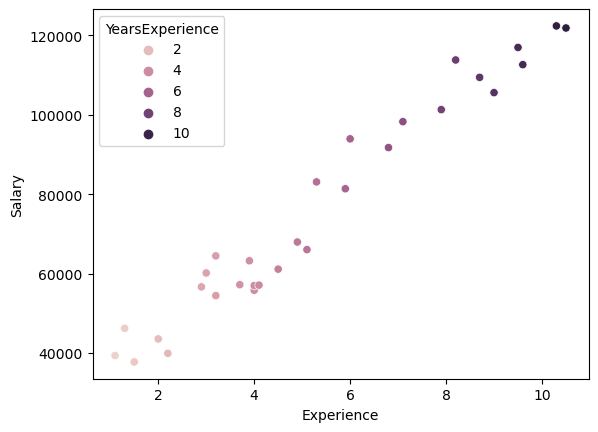

In [6]:
#label once and check its distribution
sb.scatterplot(data =df, x = 'YearsExperience' , y  = "Salary",hue = 'YearsExperience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [7]:
#2. split the dataset
X = df.iloc[ : , : -1  ].values #predict (input values / independent variables)
y = df.iloc[ : , 1].values #target 
    

In [8]:
#3. split into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


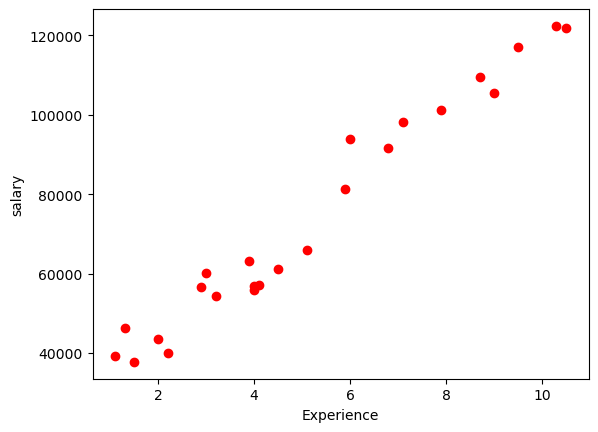

In [9]:
#4. check the relationship - if linear or non linear? using visual 
plt.scatter(X_train, y_train , color= 'red')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.show()  #it shows the data is semi linear 

In [11]:
#5. if it is linear - then use the simple linear regression 
lr = LinearRegression()  #lr = name of the model

In [12]:
#6. train the model 
#we use .fit() to train the model
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
#7. predict / testing
test_predict = lr.predict(X_test)
lr.predict([[5.9]])

train_predict = lr.predict(X_train)

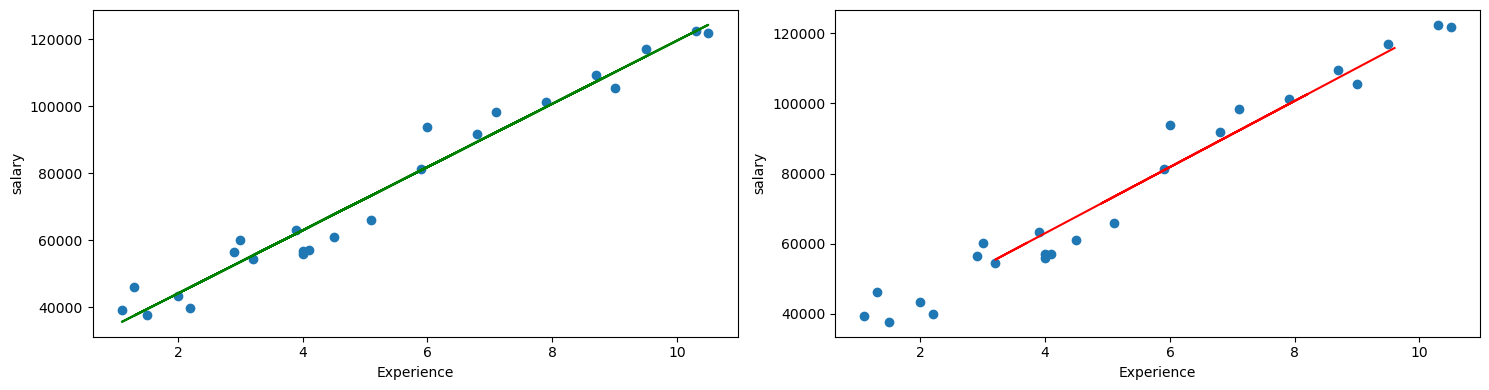

In [14]:
#8. check the testing and training diff  using the visual 
plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train)
plt.plot(X_train,train_predict, color ='green')  #print the line on basis of training dataset
plt.xlabel('Experience')
plt.ylabel('salary')


#to check that how much it is deviated from actual scatters of trained dataset 
plt.subplot(1,2,2)
plt.scatter(X_train,y_train)
plt.plot(X_test,test_predict,color = 'red')
plt.xlabel('Experience')
plt.ylabel('salary')

plt.tight_layout()  #adjust the apacing between two plots , prevent overlapping  
plt.show()

In [16]:
#check the  output randomly


def Salary(exp):
    print('Your salary is :')
    x= lr.predict([[exp]])
    return x
Salary(exp = float(input('Enter your work experience')))

    

Enter your work experience 10


Your salary is :


array([119559.73624209])

In [25]:
#find insights

m=lr.coef_  #to check the cofficient of the equation   == m 
b=lr.intercept_  #to find the intercept of the value  == b

In [26]:
#as we know y = mx +c
y = m * 10 + b  #let experience  = 10 years
print(y)

[119559.73624209]


In [32]:
#to check the accuracy of the model 
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test,test_predict)
mae= mean_absolute_error(y_test,test_predict)
rmse= np.sqrt(mse)
r2 = r2_score(y_test,test_predict)

print(f'MAE : {mae} \n')
print(f'MSE : {mse} \n')
print(f'RMSE : {rmse} \n')
print(f'R2 score  : {r2} \n')


MAE : 6286.453830757749 

MSE : 49830096.85590839 

RMSE : 7059.04362190151 

R2 score  : 0.9024461774180497 



In [ ]:
#what these accuracy values tell us about 
1. MAE = (mean absolute error ) ~ means how much our model predicts away from the actual  target output 
                                ~it simple give the average of all the errors by adding them  up 
                                ~ but take absolute (mod ) of the negative or positive errors 
   Example - above mae =6286 ~tells us our model predicts that 6286 rupees up or down from actual price or output
                           
                            [if MAE > MSE -> not worry more , you model is well ]
                            [ MAE = MSE -> model is average , predicts well , but made the mistakes ]
                            [MAE < MSE -> model made the mistakes , huge , that need to be resolved]

2. MSE = ( mean squared error ) ~ how big mistakes my model create , that worrys! about to be 
                                ~ squared the all errors  , to get the bigger ones and focus
                                ~ punishes big errors more  
                                ~ give the average of all errors but after squaring them up - 
                                  to handle the negative values by squaring and also punish big errors like 30k
                                ~ more case sensitive towards the big errors
   Exaample - like model make errors like - 2,000 , 5,000 ,  30,000

So after squaring up 
2,000 =4,000,000  
5,000  =25,000,000
30,000  =900,000,000  !  is a big value
                   
3. RMSE = (root mean squared error)